# Problem 1:Prediction task is to determine whether a person makes over 50K a year.

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import tree
from sklearn.cross_validation import KFold, cross_val_score
from sklearn.cross_validation import train_test_split
%matplotlib inline

In [28]:
data = pd.read_csv(
    "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data",
    names=[
        "Age", "Workclass", "fnlwgt", "Education", "Education-Num", "Marital_Status",
        "Occupation", "Relationship", "Race", "Sex", "Capital_Gain", "Capital_Loss",
        "Hours_per_week", "Country", "Target"],
        sep=',')

In [3]:
df= pd.DataFrame(data)

In [4]:
data.head()

,Age,Workclass,fnlwgt,Education,Education-Num,Marital_Status,Occupation,Relationship,Race,Sex,Capital_Gain,Capital_Loss,Hours_per_week,Country,Target
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [38]:
set(data['Workclass'])

{' ?',
 ' Federal-gov',
 ' Local-gov',
 ' Never-worked',
 ' Private',
 ' Self-emp-inc',
 ' Self-emp-not-inc',
 ' State-gov',
 ' Without-pay'}

In [11]:
data['workclass_num'] = data.Workclass.map({' Private':0, ' State-gov':1, ' Federal-gov':2, ' Self-emp-not-inc':3, ' Self-emp-inc':4, ' Local-gov':5, ' Without-pay':6, ' ?':7,' Never-worked':8}).astype(int)
data['over50K'] = data['Target'].map({' <=50K': 0, ' >50K': 1}).astype(int)
data['marital_num'] = data['Marital_Status'].map({' Married-spouse-absent': 0, ' Widowed': 1, 
                                                             ' Married-civ-spouse': 2, ' Separated': 3, ' Divorced': 4, 
                                                             ' Never-married': 5, ' Married-AF-spouse': 6}).astype(int)
data['race_num'] = data['Race'].map({' Black': 0, ' Asian-Pac-Islander': 1, ' Other': 2, ' White': 3, 
                                             ' Amer-Indian-Eskimo': 4}).astype(int)
data['sex_num'] = data['Sex'].map({' Male': 0, ' Female': 1}).astype(int)
data['rel_num'] = data.Relationship.map({' Not-in-family':0, ' Unmarried':0, ' Own-child':0, ' Other-relative':0, ' Husband':1, ' Wife':1})

In [32]:
data.head()

,Age,Workclass,fnlwgt,Education,Education-Num,Marital_Status,Occupation,Relationship,Race,Sex,...,Capital_Loss,Hours_per_week,Country,Target,workclass_num,over50K,marital_num,race_num,sex_num,rel_num
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,...,0,40,United-States,<=50K,1.0,0,5,3,0,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,...,0,13,United-States,<=50K,3.0,0,2,3,0,1
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,...,0,40,United-States,<=50K,0.0,0,4,3,0,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,...,0,40,United-States,<=50K,0.0,0,2,0,0,1
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,...,0,40,Cuba,<=50K,0.0,0,2,0,1,1


# Problem 2:Which factors are important

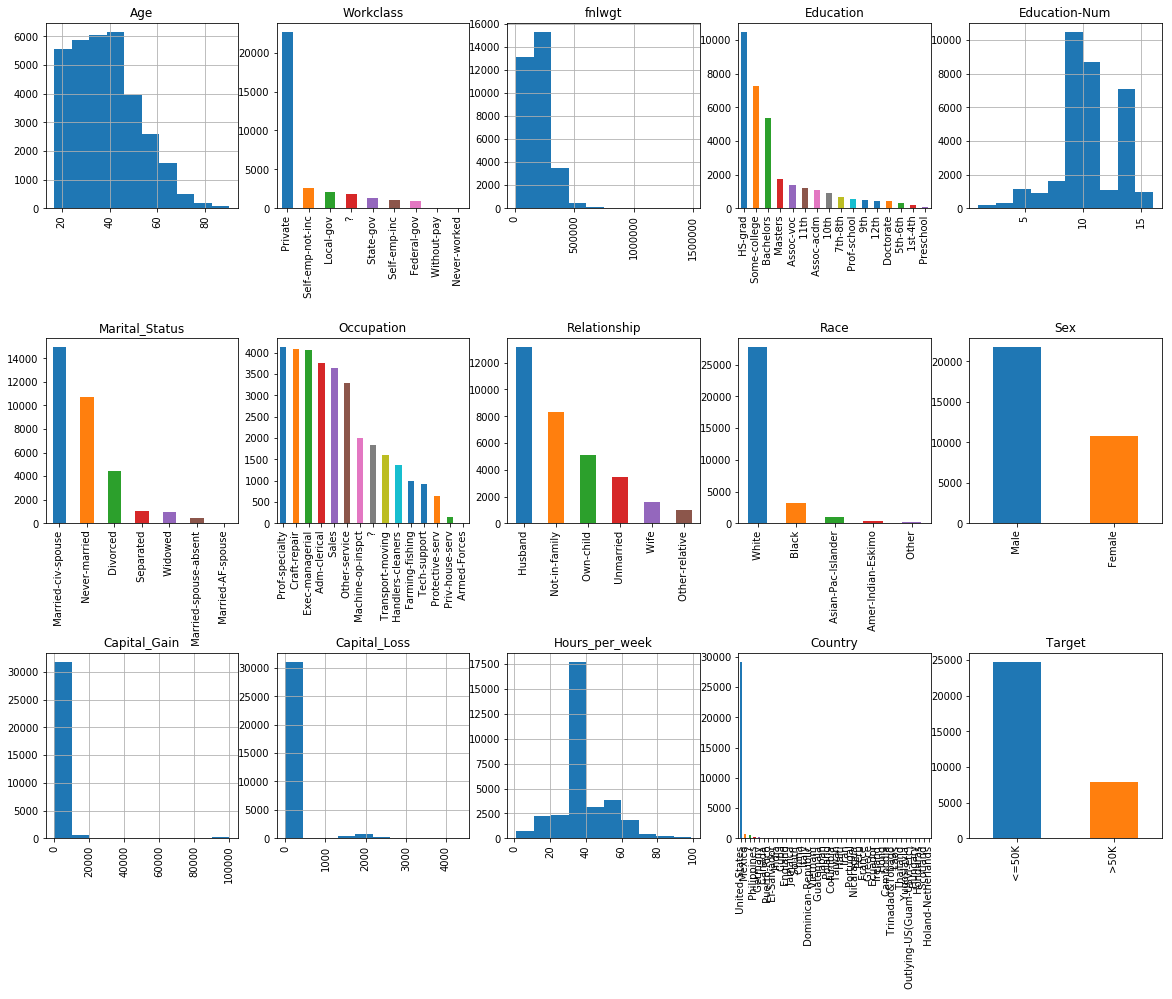

In [4]:
import matplotlib.pyplot as plt
from math import ceil
fig = plt.figure(figsize=(20,15))
cols = 5
rows = ceil(float(data.shape[1]) / cols)
for i, column in enumerate(data.columns):
    ax = fig.add_subplot(rows, cols, i + 1)
    ax.set_title(column)
    if data.dtypes[column] == np.object:
        data[column].value_counts().plot(kind="bar", axes=ax)
    else:
        data[column].hist(axes=ax)
        plt.xticks(rotation="vertical")
plt.subplots_adjust(hspace=0.7, wspace=0.2)

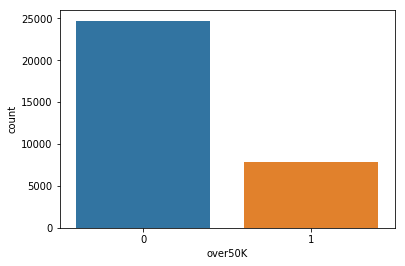

In [26]:
sns.countplot(data['over50K'],label="Count")
plt.show()

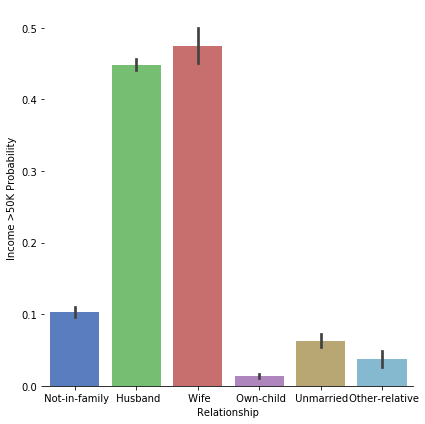

In [13]:
g = sns.factorplot(x="Relationship",y="over50K",data=data,kind="bar", size = 6 ,palette = "muted")
g.despine(left=True)
g = g.set_ylabels("Income >50K Probability")
plt.show()

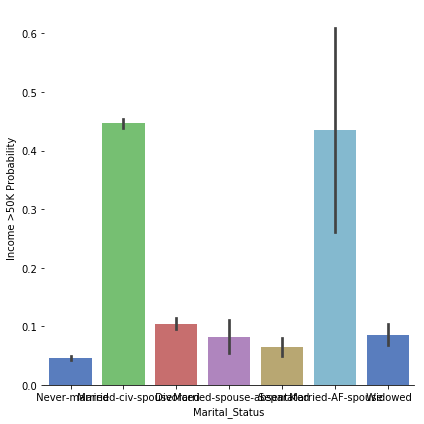

In [15]:
g = sns.factorplot(x="Marital_Status",y="over50K",data=data,kind="bar", size = 6 ,palette = "muted")
g.despine(left=True)
g = g.set_ylabels("Income >50K Probability")
plt.show()

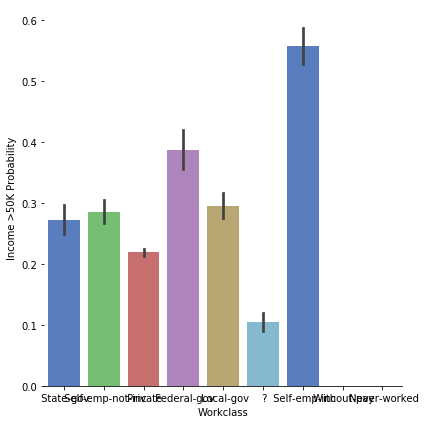

In [19]:
g = sns.factorplot(x="Workclass",y="over50K",data=data,kind="bar", size = 6 ,palette = "muted")
g.despine(left=True)
g = g.set_ylabels("Income >50K Probability")
plt.show()

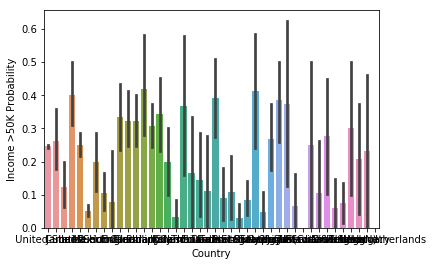

In [20]:
g = sns.barplot(x="Country",y="over50K",data=data)
g = g.set_ylabel("Income >50K Probability")
plt.show()

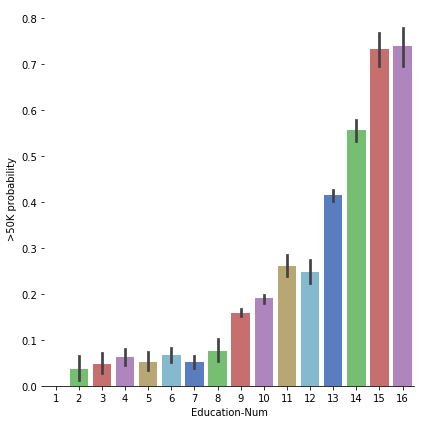

In [23]:
g = sns.factorplot(x="Education-Num",y="over50K",data=data,kind="bar",size = 6,palette = "muted")
g.despine(left=True)
g = g.set_ylabels(">50K probability")

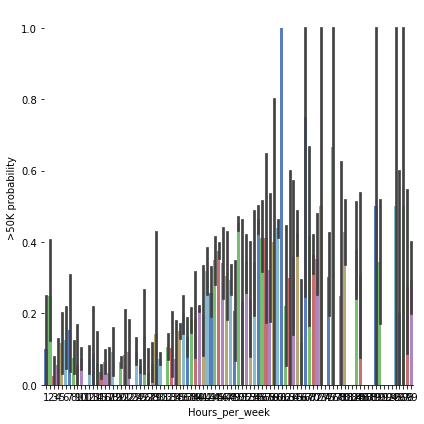

In [24]:
g  = sns.factorplot(x="Hours_per_week",y="over50K",data=data,kind="bar",size = 6,palette = "muted")
g.despine(left=True)
g = g.set_ylabels(">50K probability")

C:\Python\lib\site-packages\matplotlib\axes\_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


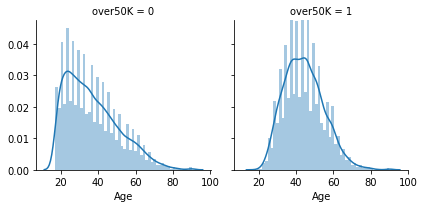

In [22]:
g = sns.FacetGrid(data, col='over50K')
g = g.map(sns.distplot, "Age")
plt.show()

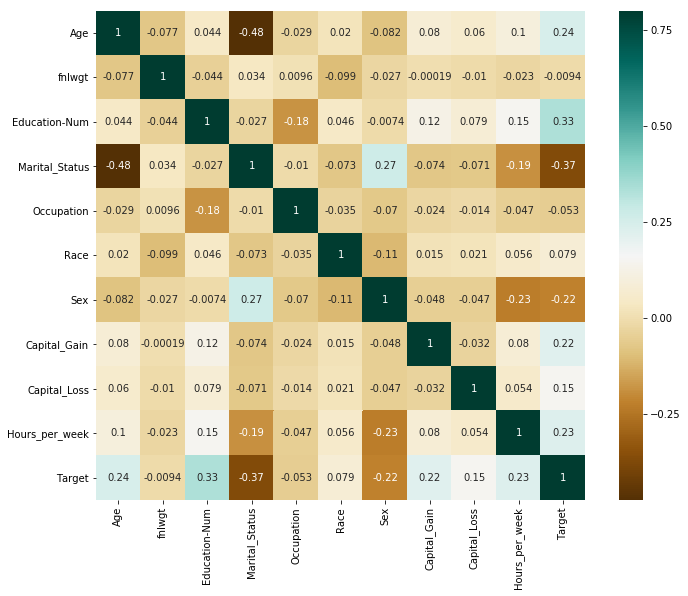

In [60]:
import seaborn as sns
hmap = df.corr()
plt.subplots(figsize=(12, 9))
sns.heatmap(hmap, vmax=.8,annot=True,cmap="BrBG", square=True);

In [41]:
X = data[['workclass_num', 'Education-Num', 'marital_num', 'race_num', 'sex_num', 'rel_num', 'Capital_Gain', 'Capital_Loss']]
y = data.over50K

# Problem 3:Which algorithms are best for this dataset

1.LOGISTIC REGRESSION

In [42]:
# create a base classifier used to evaluate a subset of attributes
logreg = LogisticRegression()

# create the RFE model and select 3 attributes
rfe = RFE(logreg, 3)
rfe = rfe.fit(X, y)

# summarize the selection of the attributes
print(rfe.support_)
print(rfe.ranking_)

[False  True False False  True  True False False]
[4 1 2 3 1 1 6 5]


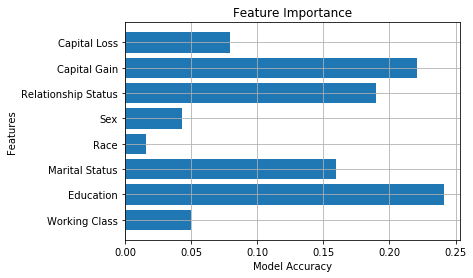

In [43]:
# fit an Extra Tree model to the data
extree = ExtraTreesClassifier()
extree.fit(X, y)

# display the relative importance of each attribute
relval = extree.feature_importances_

# horizontal bar plot of feature importance
pos = np.arange(8) + 0.5
plt.barh(pos, relval, align='center')
plt.title("Feature Importance")
plt.xlabel("Model Accuracy")
plt.ylabel("Features")
plt.yticks(pos, ('Working Class', 'Education', 'Marital Status', 'Race', 'Sex', 'Relationship Status', 'Capital Gain', 'Capital Loss'))
plt.grid(True)

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=13)

In [45]:
from sklearn.linear_model import LogisticRegression

# instantiate
logreg = LogisticRegression()

# fit
logreg.fit(X_train, y_train)

# predict
y_pred = logreg.predict(X_test)

print('LogReg %s' % metrics.accuracy_score(y_test, y_pred))

LogReg 0.8387176022601646


K-FOLD

In [46]:
kf = KFold(len(data), n_folds=10, shuffle=False)
print('KFold CrossValScore %s' % cross_val_score(logreg, X, y, cv=kf).mean())

KFold CrossValScore 0.8391637290010026


K-NEAREST NEIGHBOURS

In [47]:
from sklearn.neighbors import KNeighborsClassifier
k_range = np.arange(1, 26)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))
print(scores.index(max(scores)), max(scores))

23 0.8597223928264341


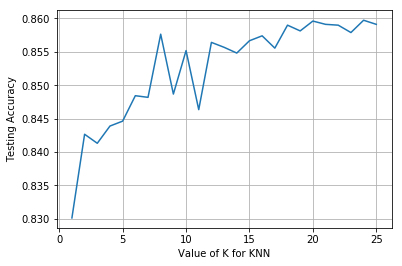

In [48]:
# plot the relationship between K and testing accuracy
plt.plot(k_range, scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')
plt.grid(True)

DECISION TREES

In [49]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
metrics.accuracy_score(y_test, y_pred)

0.8565286819801007

In [52]:
data = data[data.Occupation != '?']
raw_data = data[data.Occupation != '?']

GRADIENT BOOSTING

In [55]:
# create the numerical dummy columns for the features
dummies = pd.get_dummies(raw_data)

# del either the greater than 50K feature or less than 50K feature
del dummies['Target_ <=50K']
dummy_data = dummies.values

# shape the features and response 
X = dummy_data[:, :-1]
y = dummy_data[:, -1]
print(X.shape, y.shape)

# fit
gbc = GradientBoostingClassifier().fit(X_train, y_train)

print('GBC %s' % gbc.score(X_test, y_test))

(32561, 114) (32561,)
GBC 0.856651517012652


In [56]:
def cap_split(row):
    if row['Capital_Gain'] > 0 and row['over50K'] == 1:
        return 1
    elif row['Capital_Gain'] > 0 and row['over50K'] == 0:
        return 2
    elif row['Capital_Gain'] <= 0 and row['over50K'] == 1:
        return 3
    else:
        return 4
    
data['cap_split'] = data.apply (lambda row: cap_split (row), axis=1)

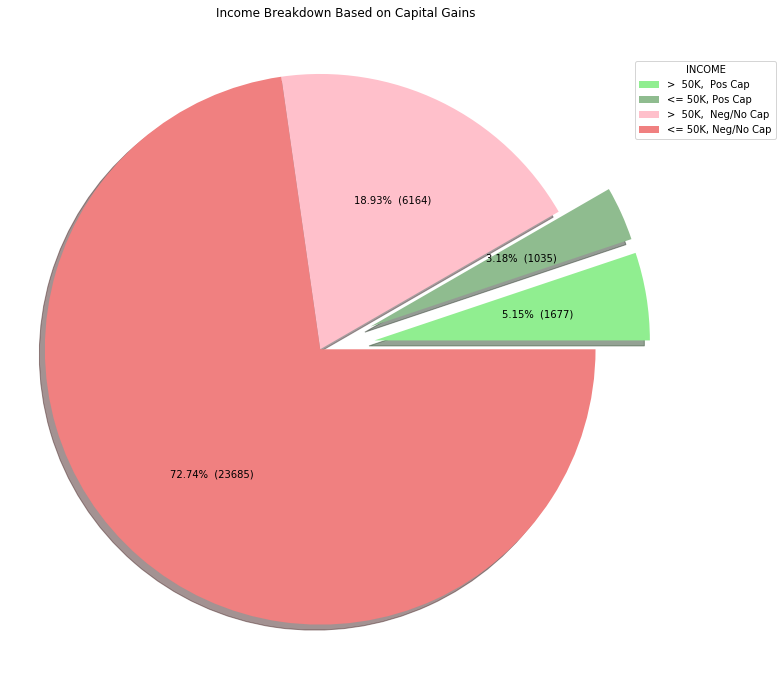

In [57]:
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{p:.2f}%  ({v:d})'.format(p=pct,v=val)
    return my_autopct
cap_split = data.cap_split.value_counts().sort_index()
colors = ['lightgreen', 'darkseagreen', 'pink', 'lightcoral']
explode = [0.2, 0.2, 0, 0]
label = ['>  50K,  Pos Cap', '<= 50K, Pos Cap', '>  50K,  Neg/No Cap', '<= 50K, Neg/No Cap']
fig = plt.figure(figsize=(12, 12)) 
ax = fig.add_subplot(1, 1, 1)
plt.pie(cap_split, shadow=True, colors=colors, explode=explode, autopct=make_autopct(cap_split))
plt.title('Income Breakdown Based on Capital Gains')
plt.axis('equal')
plt.legend(label, title='INCOME', bbox_to_anchor=(1.15, .95))

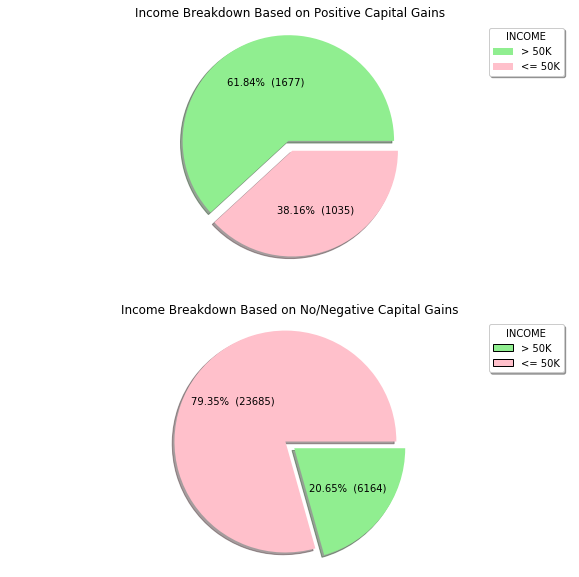

In [59]:
import matplotlib.patches as mpatches
%matplotlib inline

caphigh = data[data['Capital_Gain'] > 0]
caplow = data[data['Capital_Gain'] <= 0]

caphigh_val = caphigh.over50K.value_counts()
caplow_val = caplow.over50K.value_counts()
colors1 = ['lightgreen', 'pink']
colors2 = ['pink', 'lightgreen']

fig = plt.figure(figsize=(10, 10))
ax1 = fig.add_subplot(2, 1, 1)
plt.pie(caphigh_val, shadow=True, explode=[0.1, 0], colors=colors1, autopct=make_autopct(caphigh_val))
plt.axis('equal')
plt.title('Income Breakdown Based on Positive Capital Gains')
plt.legend(labels=['> 50K', '<= 50K'], frameon=True, shadow=True, title='INCOME')

ax2 = fig.add_subplot(2, 1, 2)
plt.pie(caplow_val, shadow=True, explode=[0.1, 0], colors=colors2, autopct=make_autopct(caplow_val))
plt.axis('equal')
plt.title('Income Breakdown Based on No/Negative Capital Gains')
ax2_patch1 = mpatches.Patch(facecolor='lightgreen',  edgecolor='black', label='> 50K')
ax2_patch2 = mpatches.Patch(facecolor='pink',  edgecolor='black', label='<= 50K')
plt.legend(handles=[ax2_patch1, ax2_patch2], frameon=True, shadow=True, title='INCOME')
plt.show()

In [4]:
df.head()

,Age,Workclass,fnlwgt,Education,Education-Num,Marital_Status,Occupation,Relationship,Race,Sex,Capital_Gain,Capital_Loss,Hours_per_week,Country,Target
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
numeric_features = ['Age','fnlwgt','Education-num','Capital_Gain','Capital_Loss','Hours_per_week','Target']
cat_features = ['Workclass','Education','Marital_Status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Country']

In [5]:
df["Workclass"] = df["Workclass"].fillna("X")
df["Occupation"] = df["Occupation"].fillna("X")
df["Country"] = df["Country"].fillna("United-States")
df.isnull().sum()

Age               0
Workclass         0
fnlwgt            0
Education         0
Education-Num     0
Marital_Status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_Gain      0
Capital_Loss      0
Hours_per_week    0
Country           0
Target            0
dtype: int64

In [6]:
df["Sex"]= df["Sex"].map({" Male":0," Female":1})

# Create Married Column - Binary Yes(1) or No(0)
df["Marital_Status"] = df["Marital_Status"].replace([' Never-married',' Divorced',' Separated',' Widowed'], 'Single')
df["Marital_Status"] = df["Marital_Status"].replace([' Married-civ-spouse',' Married-spouse-absent',' Married-AF-spouse'], 'Married')
df["Marital_Status"] = df["Marital_Status"].map({"Married":1, "Single":0})
df["Marital_Status"] = df["Marital_Status"].astype(int)

# Drop the data you don't want to use
df.drop(labels=["Workclass","Education","Occupation","Relationship","Race","Country"], axis = 1, inplace = True)
print('Dataset with Dropped Labels')
print(df.head())

Dataset with Dropped Labels
   Age  fnlwgt  Education-Num  Marital_Status  Sex  Capital_Gain  \
0   39   77516             13               0    0          2174   
1   50   83311             13               1    0             0   
2   38  215646              9               0    0             0   
3   53  234721              7               1    0             0   
4   28  338409             13               1    1             0   

   Capital_Loss  Hours_per_week  Target  
0             0              40   <=50K  
1             0              13   <=50K  
2             0              40   <=50K  
3             0              40   <=50K  
4             0              40   <=50K  


LINEAR DISCRIMINANT ANALYSIS, NAIVE BAYE'S AND RANDOM FORESTS

In [21]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve, train_test_split, KFold
array = df.values
X = array[:,0:8]
Y = array[:,8]
print('Split Data: X')
print(X)
print('Split Data: Y')
print(Y)
validation_size = 0.20
seed = 7
num_folds = 10
scoring = 'accuracy'
X_train, X_validation, Y_train, Y_validation = train_test_split(X,Y,
    test_size=validation_size,random_state=seed)

# Params for Random Forest
num_trees = 100
max_features = 3

#Spot Check 5 Algorithms (LR, LDA, KNN, CART, GNB, SVM)
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('RF', RandomForestClassifier(n_estimators=num_trees, max_features=max_features)))
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=10, random_state=seed)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

Split Data: X
[[39 77516 13 ... 2174 0 40]
 [50 83311 13 ... 0 0 13]
 [38 215646 9 ... 0 0 40]
 ...
 [58 151910 9 ... 0 0 40]
 [22 201490 9 ... 0 0 20]
 [52 287927 9 ... 15024 0 40]]
Split Data: Y
[' <=50K' ' <=50K' ' <=50K' ... ' <=50K' ' <=50K' ' >50K']
LR: 0.797797 (0.009334)
LDA: 0.830121 (0.005715)
KNN: 0.775837 (0.011082)
CART: 0.806895 (0.007811)
NB: 0.794572 (0.009167)
RF: 0.842291 (0.005937)


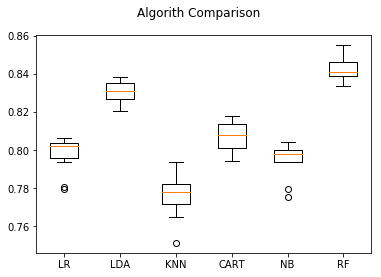

In [22]:
fig = plt.figure()
fig.suptitle('Algorith Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [25]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
random_forest = RandomForestClassifier(n_estimators=250,max_features=5)
random_forest.fit(X_train, Y_train)
predictions = random_forest.predict(X_validation)
print("Accuracy: %s%%" % (100*accuracy_score(Y_validation, predictions)))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

Accuracy: 84.13941348073085%
[[4524  427]
 [ 606  956]]
             precision    recall  f1-score   support

      <=50K       0.88      0.91      0.90      4951
       >50K       0.69      0.61      0.65      1562

avg / total       0.84      0.84      0.84      6513



# CONCLUSION

Logistic Regression 0.8387176022601646:
K-Fold and KNN-0.8497223928264341:
Decision Trees 0.8565286819801007:
xg Gradient Boosting 0.856651517012652:
Linear Discriminant Analysis: 0.830121 :
K Nearest Neighbours: 0.775837 :
CART: 0.806895 :
Naive Baye's: 0.794572 :
Random Forests: 0.842291 

DECISION TREES AND XG GRADIENT BOOSTING give better results : 0.86(approx)